In [1]:
import numpy as np
import pandas as pd

In [2]:
#Membaca data
home = pd.read_csv("train.csv")
home.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Informasi Data
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Menampilkan Semua Nama Kolom
home.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Menyeleksi Kolom
homefix = home[['SalePrice', 'LotArea', 'GarageArea', 'OverallCond', 'TotalBsmtSF', 
'FullBath', 'BedroomAbvGr', 'SaleCondition', 'Neighborhood']]
homefix.head()

,SalePrice,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr,SaleCondition,Neighborhood
0,208500,8450,548,5,856,2,3,Normal,CollgCr
1,181500,9600,460,8,1262,2,3,Normal,Veenker
2,223500,11250,608,5,920,2,3,Normal,CollgCr
3,140000,9550,642,5,756,1,3,Abnorml,Crawfor
4,250000,14260,836,5,1145,2,4,Normal,NoRidge


In [6]:
# Mengecek NA/NULL
homefix.isnull().any()

SalePrice        False
LotArea          False
GarageArea       False
OverallCond      False
TotalBsmtSF      False
FullBath         False
BedroomAbvGr     False
SaleCondition    False
Neighborhood     False
dtype: bool

In [7]:
# Ukuran data
homefix.shape

(1460, 9)

In [8]:
# Deskripsi data homefix untuk variabel numerik

homefix.describe()

,SalePrice,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,472.980137,5.575342,1057.429452,1.565068,2.866438
std,79442.502883,9981.264932,213.804841,1.112799,438.705324,0.550916,0.815778
min,34900.000000,1300.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,129975.000000,7553.500000,334.500000,5.000000,795.750000,1.000000,2.000000
50%,163000.000000,9478.500000,480.000000,5.000000,991.500000,2.000000,3.000000
75%,214000.000000,11601.500000,576.000000,6.000000,1298.250000,2.000000,3.000000
max,755000.000000,215245.000000,1418.000000,9.000000,6110.000000,3.000000,8.000000


# EDA (Exploratory Data Analysis)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

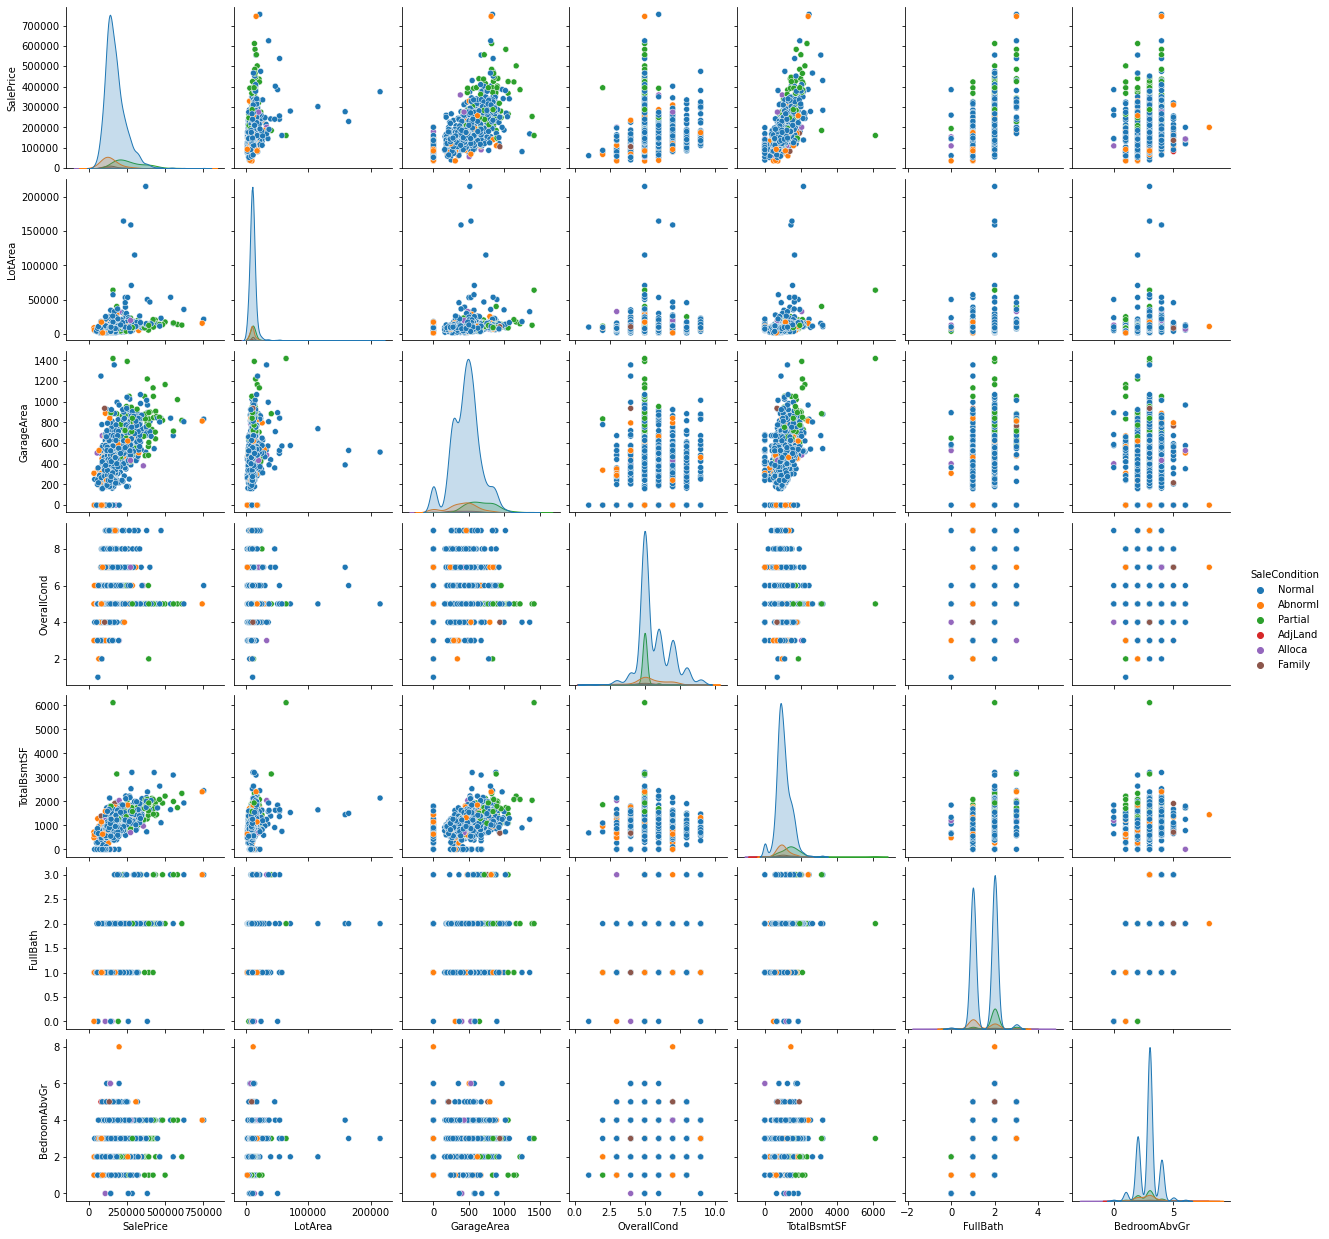

In [11]:
# Pairplot dengan warnanya berdasarkan kategori salecondition

sns.pairplot(homefix, hue="SaleCondition")

<AxesSubplot:>

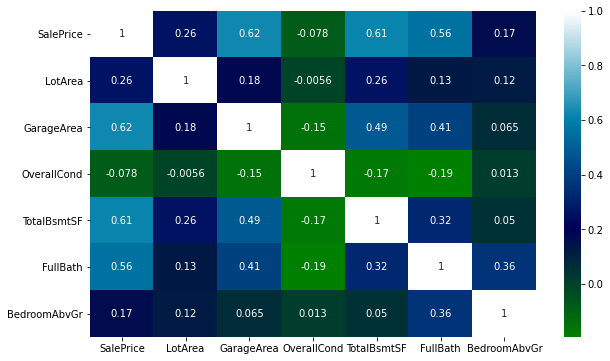

In [12]:
# Heatmap untuk korelasi 

plt.figure(figsize=(10,6))
sns.heatmap(homefix.corr(), annot=True,cmap="ocean" )

In [14]:
# Korelasi dengan saleprice
homefix.corr().SalePrice.sort_values(ascending=False)

SalePrice       1.000000
GarageArea      0.623431
TotalBsmtSF     0.613581
FullBath        0.560664
LotArea         0.263843
BedroomAbvGr    0.168213
OverallCond    -0.077856
Name: SalePrice, dtype: float64

# MEMBENTUK VARIABEL DUMMY

In [15]:
# Variabel X
x = homefix.drop("SalePrice", axis=1)

In [16]:
# Membentuk variabel dummy 
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,LotArea,GarageArea,OverallCond,TotalBsmtSF,FullBath,BedroomAbvGr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,548,5,856,2,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9600,460,8,1262,2,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,11250,608,5,920,2,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9550,642,5,756,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14260,836,5,1145,2,4,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [17]:
# Variabel Y
y = homefix. SalePrice

# Data Training dan testing 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 35)
(292, 35)
(1168,)
(292,)


# REGRESI

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Memodelkan dengan regresi
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
# Nilai intercept 
model.intercept_

-11727.846911277447

In [25]:
# Koefisien regresi
koefisien =  pd.DataFrame(model.coef_, x.columns, columns=['koefisien_reg'])
koefisien

,koefisien_reg
LotArea,0.550363
GarageArea,73.598830
OverallCond,8092.556993
TotalBsmtSF,47.001577
FullBath,24784.754748
BedroomAbvGr,5174.176617
SaleCondition_AdjLand,17851.558558
SaleCondition_Alloca,25229.302415
SaleCondition_Family,-14434.404676
SaleCondition_Normal,5859.410927


In [26]:
# Nilai Rsquare
model.score(x_train, y_train)

0.7455191753490632

In [27]:
# Prediksi 
prediksi = model.predict(x_test)
prediksi

array([187814.06924923, 156773.31004662, 145339.89539678, 208796.02852021,
       127527.99498852, 215097.33232749, 320719.31028352, 136404.15685989,
       178257.68934241, 124157.59059678, 179651.02115247, 181731.09562928,
       149032.98764592,  93936.56025844, 189848.63893039, 154440.28947153,
        77311.31778798, 311659.60783876, 189521.91565515, 137141.25695398,
       162349.90171304, 174714.06295986, 110283.88727106, 128728.89051502,
       197335.0364841 , 182562.34785619, 214431.61788894, 199150.58113383,
       140854.40325695, 141130.08914312, 133110.15079096, 243646.42735556,
       174250.7103938 , 218163.51056742, 325321.13522405, 217476.19643305,
       206141.2548199 , 225822.10259987, 179541.45600049,  98452.95064864,
       169999.52174051, 209648.14183956, 156417.98544453, 157908.14409856,
       225564.42109863, 130560.30154904, 278950.68226302, 305730.07304393,
       215701.50291464, 118438.43759563, 193220.16579548, 279940.9346918 ,
       144122.70631995, 1

In [29]:
#Secara Statistika
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
y_train_sm = sm.add_constant(y_train)

model1 = sm.OLS(y_train, x_train_sm).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     94.75
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.26e-307
Time:                        16:54:05   Log-Likelihood:                -14039.
No. Observations:                1168   AIC:                         2.815e+04
Df Residuals:                    1132   BIC:                         2.833e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.173e+